<a href="https://colab.research.google.com/github/MiguelEconomics/bread_price/blob/main/bread_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis del precio del pan en Colombia (2003-2023)

In [4]:
%pip install dateparser
import dateparser
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


El Ministerio de Agricultura de Colombia, a través de la plataforma [***Agronet***](https://www.agronet.gov.co/estadistica/Paginas/home.aspx?cod=12) dispone estadísticas sobre el precio de productos agrícolas al por mayor en diferentes mercados. Para este análisis, las cifras de los productos estudiados son tomadas únicamente para la ciudad de <ins>Bogotá</ins>.

## Fuente de datos

Los archivos .xlsx que se obtienen de Agronet conservan el siguiente formato por cada producto:

|  Mercado | Producto | Fecha    | Precio $/KG |
|----------|----------|----------|------------|
| Bogotá |Remolacha|Miercoles, Enero 1 de 1997|182.33|
| ...    | ...   | ...   |  ...          |
| ...    | ...   | ...   |  ...          |

			


Para la correcta graficación de los datos es necesario:

- Extraer la fecha correcta en formato datetime64 
- Filtrar las observaciones de los últimos 20 años (Fecha > 2003) 
- Crear una columna en base 100 con 2003 como año de referencia*

*Esto permite comparar los diferentes productos al enfocarse en el cambio de sus precios respecto a un año en específico.

La siguiente función abarca las transformacione mencionadas:

In [5]:
azucar = pd.read_excel('./azucar.xlsx')
harina_trigo = pd.read_excel('./harina_trigo.xlsx')
huevo_A = pd.read_excel('./huevo_A.xlsx')
queso = pd.read_excel('./queso_doble_crema.xlsx')
sal = pd.read_excel('./sal.xlsx')

In [6]:
def ingredients(product):
  # Extraer la fecha correcta en formato datetime64
  product['date'] = product['Fecha'].apply(dateparser.parse, languages=['es'])

  # Filtrar las observaciones de los últimos 20 años (Fecha > 2003)
  product = product.drop(product[product['date'] < '2003-01-01'].index)
  product = product.reset_index(drop=True)
  
  # Crear una columna en base 100 con 2003 como año de referencia
  product['price_base_100'] = product['Precio $/KG']/product['Precio $/KG'][0]

  return product

In [7]:
sugar = ingredients(azucar)
wheat = ingredients(harina_trigo)
eggs_A = ingredients(huevo_A) # El precio del huevo corresponde a una unidad de tamaño A
cheese = ingredients(queso)
salt = ingredients(sal)

Como ejemplo de la transformación de los datos observemos el DataFrame sobre el trigo:

In [8]:
wheat

,Mercado,Producto,Fecha,Precio $/KG,date,price_base_100
0,Bogotá,Harina de trigo (Semanal | Mensual),"Miercoles, Enero 1 de 2003",1168.5,2003-01-01,1.000000
1,Bogotá,Harina de trigo (Semanal | Mensual),"Sabado, Febrero 1 de 2003",1193.0,2003-02-01,1.020967
2,Bogotá,Harina de trigo (Semanal | Mensual),"Sabado, Marzo 1 de 2003",1196.0,2003-03-01,1.023534
3,Bogotá,Harina de trigo (Semanal | Mensual),"Martes, Abril 1 de 2003",1204.0,2003-04-01,1.030381
4,Bogotá,Harina de trigo (Semanal | Mensual),"Jueves, Mayo 1 de 2003",1148.0,2003-05-01,0.982456
...,...,...,...,...,...,...
225,"Bogotá, D.C., Corabastos",Harina de trigo (Semanal | Mensual),"Viernes, Julio 1 de 2022",3533.0,2022-07-01,3.023534
226,"Bogotá, D.C., Corabastos",Harina de trigo (Semanal | Mensual),"Jueves, Septiembre 1 de 2022",3682.0,2022-09-01,3.151048
227,"Bogotá, D.C., Corabastos",Harina de trigo (Semanal | Mensual),"Sabado, Octubre 1 de 2022",3807.0,2022-10-01,3.258023
228,"Bogotá, D.C., Corabastos",Harina de trigo (Semanal | Mensual),"Miercoles, Febrero 1 de 2023",3871.0,2023-02-01,3.312794


# Estableciendo la estética de las gráficas

In [9]:
mpl.style.use(['ggplot'])
plt.rcParams['axes.facecolor']='white'

# Axes
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

Primera gráfica: Aumento de los precios en ingredientes del pan respecto a 2003

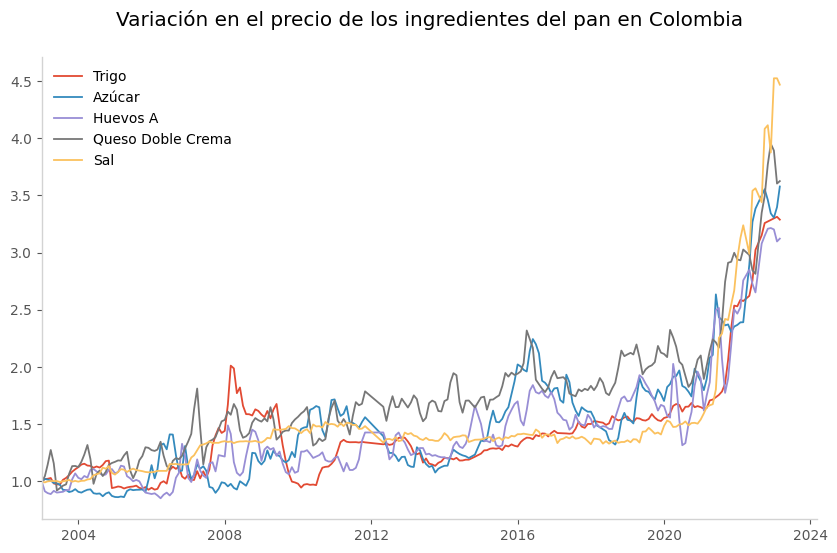

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(wheat['date'], wheat['price_base_100'], linewidth=1.3)
ax.plot(sugar['date'], sugar['price_base_100'], linewidth=1.3)
ax.plot(eggs_A['date'], eggs_A['price_base_100'], linewidth=1.3)
ax.plot(cheese['date'], cheese['price_base_100'], linewidth=1.3)
ax.plot(salt['date'], salt['price_base_100'], linewidth=1.3)

ax.set_title('Variación en el precio de los ingredientes del pan en Colombia', y=1.05)
ax.legend(['Trigo', 'Azúcar', 'Huevos A', 'Queso Doble Crema', 'Sal'], frameon=False)

plt.xlim(pd.Timestamp('2003-01-01'))

plt.show()

## Incorporando el aumento del salario mínimo

La información histórica del salario mínimo en Colombia es tomada del [Banco de la República](https://www.banrep.gov.co/es/estadisticas/salarios).

In [11]:
salary = pd.read_excel("./salario_minimo.xlsx", skiprows=5, nrows=40)
salary.head()

,Año (aaaa),Salario mínimo diario (COP),Salario mínimo mensual (COP),Variación porcentual anual %,Decretos del Gobierno Nacional
0,1984,376.60,11298,NaN,3506 de diciembre 27 de 1983
1,1985,451.92,13558,20.0,0001 de enero de 1985
2,1986,560.38,16811,24.0,3754 de diciembre de 1985
3,1987,683.66,20510,22.0,3732 de diciembre de 1986
4,1988,854.58,25637,25.0,2545 de diciembre de 1987


Eliminamos columnas que no entrarán en el análisis y filtramos los datos desde 2003.

In [12]:
salary = salary.drop(columns=['Variación porcentual anual %','Decretos del Gobierno Nacional'])

In [13]:
salary = salary.drop(salary[salary['Año (aaaa)'] < 2003].index)

In [14]:
salary = salary.reset_index(drop=True)

In [15]:
salary

,Año (aaaa),Salario mínimo diario (COP),Salario mínimo mensual (COP)
0,2003,11066.67,332000
1,2004,11933.33,358000
2,2005,12716.67,381500
3,2006,13600.00,408000
4,2007,14456.67,433700
5,2008,15383.33,461500
6,2009,16563.33,496900
7,2010,17166.67,515000
8,2011,17853.33,535600
9,2012,18890.00,566700


## Transformación de la información

In [16]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año (aaaa)                    21 non-null     int64  
 1   Salario mínimo diario (COP)   21 non-null     float64
 2   Salario mínimo mensual (COP)  21 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 632.0 bytes


Es necesaria la tranformación del DataFrame del salario mínimo en Colombia, pues para su graficación se compatible con la variación del precios de los ingredientes del pan se requiere:

- La fecha debe estar en formato datetime64
- Crear nuevas filas que muestren el mismo salario para todos los meses de un mismo año (Esto se hace para que la graficación entre salario y precios sea coherente)
- Crear una columna base 100 respecto a 2003

In [17]:
# Convertimos la fecha a string para poder extraer el año
salary['Año (aaaa)'] = salary['Año (aaaa)'].astype(str)

# Creamos un df que tendrá 12 filas por año
monthly_salary_df = pd.DataFrame()

# Extraemos cada fila del año y salario del DataFrame original
for _, row in salary.iterrows():
    year = row['Año (aaaa)']
    salary = row['Salario mínimo mensual (COP)']
    
    # Creamos los meses para los años a consideración
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='M')

    # Crear un df temporal con el salario para los meses del año en iteración
    temp_df = pd.DataFrame({'Año (aaaa)': year, 'Salario mínimo mensual (COP)': salary}, index=dates)
    
    # Concatenamos la información del año al DataFrame
    monthly_salary_df = pd.concat([monthly_salary_df, temp_df])

# Establecer la fecha completa como indice
monthly_salary_df.reset_index(inplace=True)
monthly_salary_df.rename(columns={'index': 'date'}, inplace=True)
monthly_salary_df['date'] = pd.to_datetime(monthly_salary_df['date'], format='%Y-%m-%d')

In [18]:
monthly_salary_df

,date,Año (aaaa),Salario mínimo mensual (COP)
0,2003-01-31,2003,332000
1,2003-02-28,2003,332000
2,2003-03-31,2003,332000
3,2003-04-30,2003,332000
4,2003-05-31,2003,332000
...,...,...,...
247,2023-08-31,2023,1160000
248,2023-09-30,2023,1160000
249,2023-10-31,2023,1160000
250,2023-11-30,2023,1160000


In [19]:
monthly_salary_df['salary_base_100'] = monthly_salary_df['Salario mínimo mensual (COP)']/monthly_salary_df['Salario mínimo mensual (COP)'][0]

In [20]:
monthly_salary_df

,date,Año (aaaa),Salario mínimo mensual (COP),salary_base_100
0,2003-01-31,2003,332000,1.000000
1,2003-02-28,2003,332000,1.000000
2,2003-03-31,2003,332000,1.000000
3,2003-04-30,2003,332000,1.000000
4,2003-05-31,2003,332000,1.000000
...,...,...,...,...
247,2023-08-31,2023,1160000,3.493976
248,2023-09-30,2023,1160000,3.493976
249,2023-10-31,2023,1160000,3.493976
250,2023-11-30,2023,1160000,3.493976


## Creando un DataFrame para el precio por unidad del pan

El precio del pan varia según la panaderia, sin embargo, para definir el cambio en el precio del pan acudí a las noticias de medios de diferentes medios de comunicación, por ejemplo, el periodico El Tiempo reporta el cambio del precio del pan de \$100 a \$200 en 2006.

- \$100 a \$200: https://www.eltiempo.com/archivo/documento/CMS-3065836
- \$200 a \$300: https://www.las2orillas.co/y-entonces-llego-el-fin-del-pan-de-doscientos/
- \$300 a \$400: https://www.semana.com/economia/macroeconomia/articulo/adios-al-pan-de-300-esta-seria-la-razon-por-la-que-las-panaderias-estarian-obligadas-a-subir-sus-precios/202122/
- \$400 a \$500: https://www.portafolio.co/economia/finanzas/la-razones-por-las-que-el-precio-del-pan-llego-a-500-pesos-568936

In [21]:
bread_price = monthly_salary_df.copy()

In [22]:
bread_price = bread_price.drop(columns=['Año (aaaa)','Salario mínimo mensual (COP)','salary_base_100'])

In [23]:
price_mapping = {
    (pd.Timestamp('2003-01-31'), pd.Timestamp('2006-12-31')): 100,
    (pd.Timestamp('2007-01-01'), pd.Timestamp('2019-12-31')): 200,
    (pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31')): 300,
    (pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31')): 400,
    (pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')): 500
}

# Función para asignar el precio según la fecha
def assign_price(row):
    for date_range, price in price_mapping.items():
        if date_range[0] <= row['date'] <= date_range[1]:
            return price

# Aplicar la función a cada fila y crear la columna 'precio'
bread_price['unit_price'] = bread_price.apply(assign_price, axis=1)

# Crear índice base 100
bread_price['price_base_100'] = bread_price['unit_price']/bread_price['unit_price'][0]

In [24]:
bread_price

,date,unit_price,price_base_100
0,2003-01-31,100,1.0
1,2003-02-28,100,1.0
2,2003-03-31,100,1.0
3,2003-04-30,100,1.0
4,2003-05-31,100,1.0
...,...,...,...
247,2023-08-31,500,5.0
248,2023-09-30,500,5.0
249,2023-10-31,500,5.0
250,2023-11-30,500,5.0


Segunda gráfica: Aumento del salario mínimo respecto a 2003

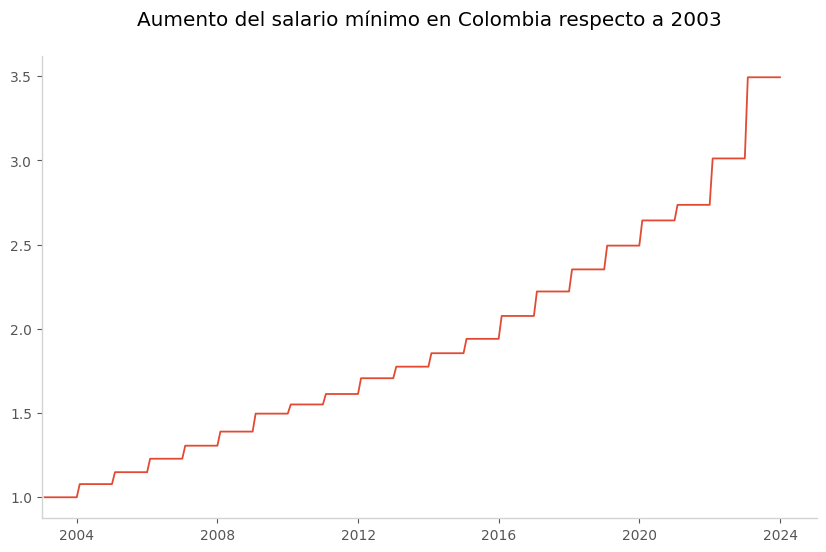

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(monthly_salary_df['date'], monthly_salary_df['salary_base_100'], linewidth=1.3)

ax.set_title('Aumento del salario mínimo en Colombia respecto a 2003', y=1.05)

plt.xlim(pd.Timestamp('2003-01-01'))

plt.show()

Gráfica final: Comparación del aumento en los ingredientes del pan respecto al salario mínimo

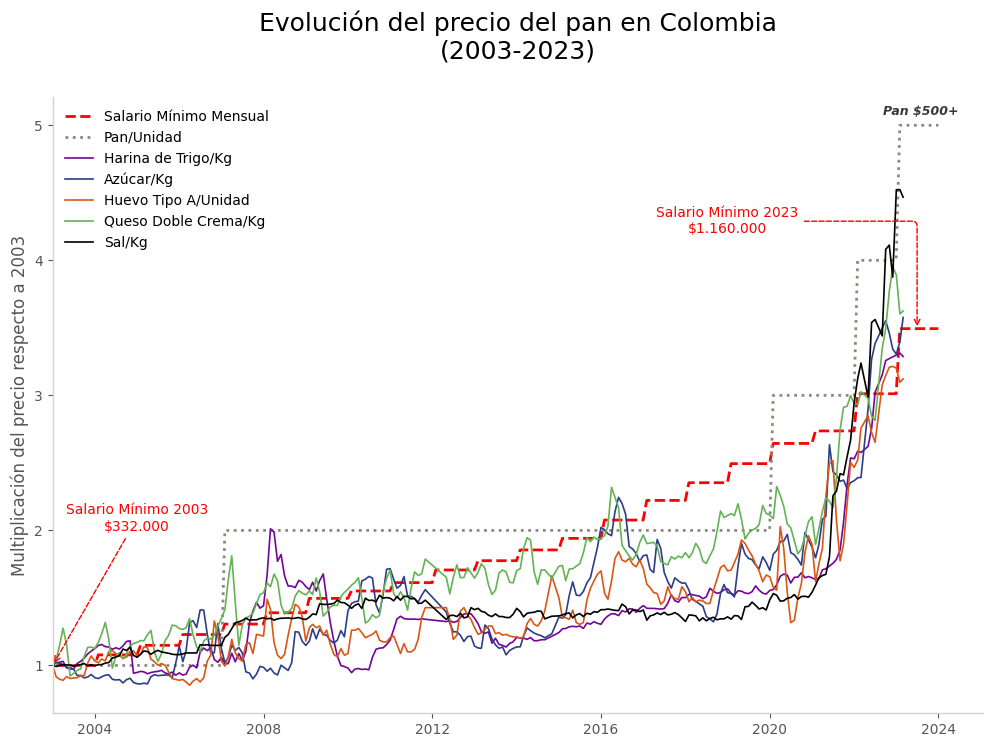

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_salary_df['date'], monthly_salary_df['salary_base_100'], linewidth=2, color='red', linestyle='--')
ax.plot(bread_price['date'], bread_price['price_base_100'], linewidth=2, color='#8a8a7d', linestyle='dotted')

ax.plot(wheat['date'], wheat['price_base_100'], linewidth=1.2, color='#740596')
ax.plot(sugar['date'], sugar['price_base_100'], linewidth=1.2, color='#2c3d8a')
ax.plot(eggs_A['date'], eggs_A['price_base_100'], linewidth=1.2, color='#db5614')
ax.plot(cheese['date'], cheese['price_base_100'], linewidth=1.2, color='#64b354')
ax.plot(salt['date'], salt['price_base_100'], linewidth=1.2, color='black')


ax.set_title('Evolución del precio del pan en Colombia\n(2003-2023)', y=1.05, fontsize=18)
ax.set_ylabel('Multiplicación del precio respecto a 2003')
ax.legend(['Salario Mínimo Mensual', 'Pan/Unidad','Harina de Trigo/Kg', 'Azúcar/Kg', 'Huevo Tipo A/Unidad', 'Queso Doble Crema/Kg', 'Sal/Kg'], frameon=False)

annotation1 = ax.annotate('Salario Mínimo 2003\n$332.000',  
                          xy=(pd.Timestamp('2003-01-01'), 1),
                          xytext=(pd.Timestamp('2005-01-01'), 2),
                          xycoords='data',
                          ha='center',
                          color='red',
                          arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=1, linestyle='dashed')
                         )

annotation2 = ax.annotate('Salario Mínimo 2023\n$1.160.000',  
                          xy=(pd.Timestamp('2023-06-30'), 3.49),
                          xytext=(pd.Timestamp('2019-01-01'), 4.2),
                          xycoords='data',
                          ha='center',
                          color='red',
                          arrowprops=dict(arrowstyle='->', connectionstyle='angle, angleA=180, angleB=-90, rad=5',
                                          color='red', lw=1, linestyle='dashed'))

ax.annotate('Pan $500+',
             xy=(pd.Timestamp('2023-07-30'), 5.1),
             rotation=0,
             va='center',
             ha='center',
             color="#3b393b",
             fontweight='bold',
             fontstyle='italic',
             size=9
             )

plt.xlim(pd.Timestamp('2003-01-01'))

plt.show()


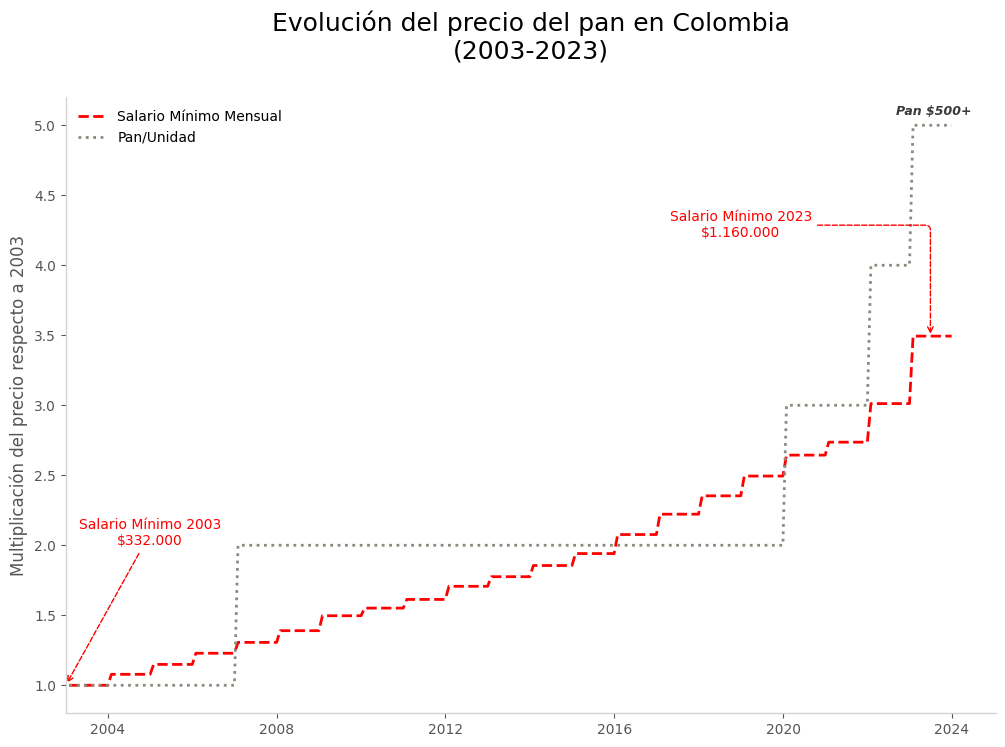

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_salary_df['date'], monthly_salary_df['salary_base_100'], linewidth=2, color='red', linestyle='--')
ax.plot(bread_price['date'], bread_price['price_base_100'], linewidth=2, color='#8a8a7d', linestyle='dotted')

# ax.plot(wheat['date'], wheat['price_base_100'], linewidth=1.2, color='#740596')
# ax.plot(sugar['date'], sugar['price_base_100'], linewidth=1.2, color='#2c3d8a')
# ax.plot(eggs_A['date'], eggs_A['price_base_100'], linewidth=1.2, color='#db5614')
# ax.plot(cheese['date'], cheese['price_base_100'], linewidth=1.2, color='#64b354')
# ax.plot(salt['date'], salt['price_base_100'], linewidth=1.2, color='black')


ax.set_title('Evolución del precio del pan en Colombia\n(2003-2023)', y=1.05, fontsize=18)
ax.set_ylabel('Multiplicación del precio respecto a 2003')
ax.legend(['Salario Mínimo Mensual', 'Pan/Unidad'], frameon=False)

annotation1 = ax.annotate('Salario Mínimo 2003\n$332.000',  
                          xy=(pd.Timestamp('2003-01-01'), 1),
                          xytext=(pd.Timestamp('2005-01-01'), 2),
                          xycoords='data',
                          ha='center',
                          color='red',
                          arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=1, linestyle='dashed')
                         )

annotation2 = ax.annotate('Salario Mínimo 2023\n$1.160.000',  
                          xy=(pd.Timestamp('2023-06-30'), 3.49),
                          xytext=(pd.Timestamp('2019-01-01'), 4.2),
                          xycoords='data',
                          ha='center',
                          color='red',
                          arrowprops=dict(arrowstyle='->', connectionstyle='angle, angleA=180, angleB=-90, rad=5',
                                          color='red', lw=1, linestyle='dashed'))

ax.annotate('Pan $500+',
             xy=(pd.Timestamp('2023-07-30'), 5.1),
             rotation=0,
             va='center',
             ha='center',
             color="#3b393b",
             fontweight='bold',
             fontstyle='italic',
             size=9
             )

plt.xlim(pd.Timestamp('2003-01-01'))

plt.show()

### <h6 align="center" style="font-size:2vw"><i> Autor: Miguel Angel Moreno Barajas </i><h6/>
### <h6 align="center" style="font-size:2vw"><a href="https://www.linkedin.com/in/miguelmorenods/" target="_blank">https://www.linkedin.com/in/miguelmorenods/</a><h6/>